Model je oblika y_hat = Theta0 + Theta1 * x
y_hat =  [0.14219055] + [[0.3225882]] *x


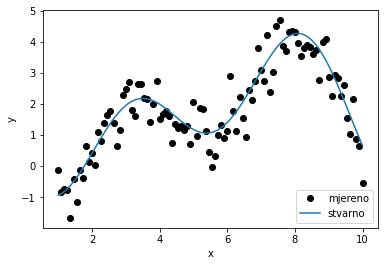

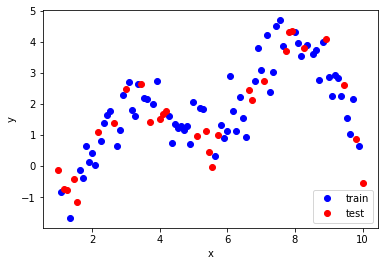

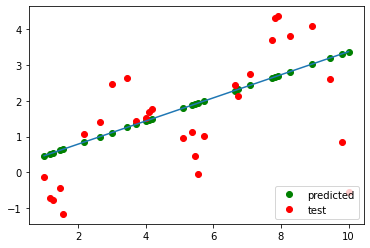

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error

def non_func(x):
  y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
  return y

def add_noise(y):
  np.random.seed(14)
  varNoise = np.max(y) - np.min(y)
  y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
  return y_noisy

x = np.linspace(1,10,100)
y_true = non_func(x)
y_measured = add_noise(y_true)
plt.figure(1)
plt.plot(x,y_measured,'ok',label='mjereno')
plt.plot(x,y_true,label='stvarno')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)
np.random.seed(12)
indeksi = np.random.permutation(len(x))
indeksi_train = indeksi[0:int(np.floor(0.7*len(x)))]
indeksi_test = indeksi[int(np.floor(0.7*len(x)))+1:len(x)]
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]
xtrain = x[indeksi_train]
ytrain = y_measured[indeksi_train]
xtest = x[indeksi_test]
ytest = y_measured[indeksi_test]
plt.figure(2)
plt.plot(xtrain,ytrain,'ob',label='train')
plt.plot(xtest,ytest,'or',label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)
linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)
print('Model je oblika y_hat = Theta0 + Theta1 * x')
print('y_hat = ', linearModel.intercept_, '+', linearModel.coef_, '*x')
#vrednovanje
ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)
plt.figure(3)
plt.plot(xtest,ytest_p,'og',label='predicted')
plt.plot(xtest,ytest,'or',label='test')
plt.legend(loc = 4)
x_pravac = np.array([1,10])
x_pravac = x_pravac[:, np.newaxis]
y_pravac = linearModel.predict(x_pravac)
plt.plot(x_pravac, y_pravac) 

##Zad 2.



In [2]:
column_ones=np.ones(len(xtrain))
column_ones=column_ones[:,np.newaxis]
x_p=np.hstack((column_ones,xtrain))
transpose=np.transpose(x_p)
inverted=np.linalg.inv(np.dot(transpose,x_p))
theta=np.dot(np.dot(inverted,transpose),ytrain)
print('Model je oblika y_hat = Theta0 + Theta1 * x')
print('y_hat = ', theta[0], '+', theta[1], '*x')

Model je oblika y_hat = Theta0 + Theta1 * x
y_hat =  [0.14219055] + [0.3225882] *x


##Zad 3.

Model je oblika:  y_kapica = Theta0 + Theta1 * x
y_kapica = [0.33416491] + [0.06445985]*x


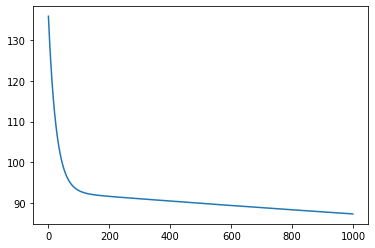

In [3]:
n = len(xtrain)
alfa = 0.001
epochs = 1000
theta = [0,0]
distances = []
for i in range(0,epochs):
    sumat1=0
    sumat2=0
    distance=0
    for j in range (0, n):
        sumat1= sumat1 + ((theta[0]*xtrain[j] + theta[1])-ytrain[j])*xtrain[j]/n
        sumat2= sumat2 + ((theta[0]*xtrain[j] + theta[1])-ytrain[j])/n
        distance=distance + (ytrain[j]-theta[0]-theta[1]*xtrain[j])
    distances.append(distance)  
    theta[0] =theta[0] - alfa*sumat1;    
    theta[1] =theta[1] - alfa*sumat2;

plt.plot(distances)
print ("Model je oblika:  y_kapica = Theta0 + Theta1 * x")
print("y_kapica = {first} + {second}*x".format(first=theta[0],second=theta[1]))

##Zad 5.

[0.7579630147780276, 0.19556471929778277, 0.14471872452176074]
[1.2745083887453057, 0.31157034291242314, 0.686262720339181]


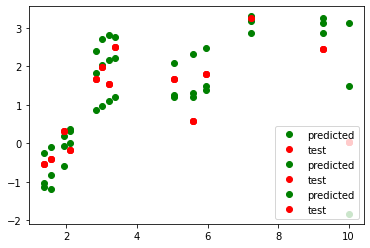

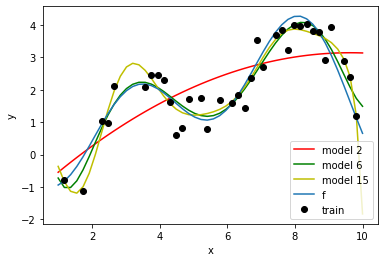

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
def non_func(x):
  y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
  return y
def add_noise(y):
  np.random.seed(14)
  varNoise = np.max(y) - np.min(y)
  y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
  return y_noisy

x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]
# make polynomial features
features = [2,6,15]
MSEtrain = []
MSEtest = []
colors = ['-r','-g','-y']
index =-1
for feature in features:
  poly = PolynomialFeatures(degree=feature)
  xnew = poly.fit_transform(x)
  index+=1
  np.random.seed(12)
  indeksi = np.random.permutation(len(xnew))
  indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
  indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]
  xtrain = xnew[indeksi_train,]
  ytrain = y_measured[indeksi_train]
  xtest = xnew[indeksi_test,]
  ytest = y_measured[indeksi_test]
  linearModel = lm.LinearRegression()
  linearModel.fit(xtrain,ytrain)
  ytest_p = linearModel.predict(xtest)
  ytrain_p = linearModel.predict(xtrain)
  MSE_test = mean_squared_error(ytest, ytest_p)
  MSE_train = mean_squared_error(ytrain, ytrain_p)
  MSEtest.append(MSE_test)
  MSEtrain.append(MSE_train)
  plt.figure(1)
  plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
  plt.plot(xtest[:,1],ytest,'or',label='test')
  plt.legend(loc = 4)
  #pozadinska funkcija vs model
  plt.figure(2)
  plt.plot(x, linearModel.predict(xnew),colors[index],label=f'model {feature}')
  
plt.plot(x,y_true,label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4)

print(MSEtrain)
print(MSEtest)

##Zad 6.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.30104e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Koeficijenti modela iz 5. zadatka za degree=15 iznose:  [2.00691412] , [[ 0.00000000e+00 -8.04321181e-01 -1.30803535e+00 -1.13766095e+00
  -1.67605184e-02  1.13063288e+00  4.41747493e-01 -1.22787685e+00
   7.55685490e-01 -2.48771197e-01  5.11963517e-02 -6.92685472e-03
   6.18935592e-04 -3.52794262e-05  1.16494683e-06 -1.69860129e-08]]
Koeficijenti modela dobivenog ridge regresijom iznose:  [-1.28221939] , [[ 0.00000000e+00 -6.91703156e-02 -9.64029713e-02 -2.54846512e-02
   1.25873620e-01  1.54255368e-01 -9.01383490e-02 -1.40031650e-02
   1.85766473e-02 -4.78368236e-03  4.14727116e-04  3.62659755e-05
  -1.19678899e-05  1.18210694e-06 -5.51878796e-08  1.03127934e-09]]


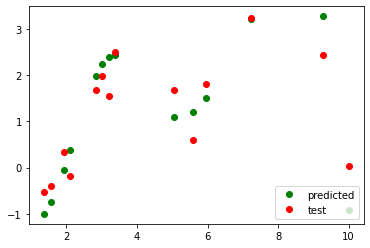

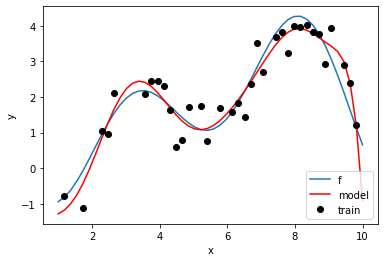

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
def non_func(x):
 y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
 return y
def add_noise(y):
 np.random.seed(14)
 varNoise = np.max(y) - np.min(y)
 y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
 return y_noisy

x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]
# make polynomial features
poly = PolynomialFeatures(degree=15)
xnew = poly.fit_transform(x)

np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]
xtrain = xnew[indeksi_train,]
ytrain = y_measured[indeksi_train]
xtest = xnew[indeksi_test,]
ytest = y_measured[indeksi_test]
linearModel_ridge = lm.Ridge()
linearModel_ridge.fit(xtrain,ytrain)
ytest_p = linearModel_ridge.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)
plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)
#pozadinska funkcija vs model
plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel_ridge.predict(xnew),'r-',label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4) 


print ('Koeficijenti modela iz 5. zadatka za degree=15 iznose: ',linearModel.intercept_,',',linearModel.coef_)
print ('Koeficijenti modela dobivenog ridge regresijom iznose: ',linearModel_ridge.intercept_,',',linearModel_ridge.coef_)

## Zad 7.

In [6]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
X = boston.data
y = boston.target
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['target'] = pd.Series(boston.target)
print(boston_df)

x = boston_df.drop(['target'], axis=1)
y = boston_df['target']


        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

5.0
50.0
22.532806324110677
21.2
9.188011545278203


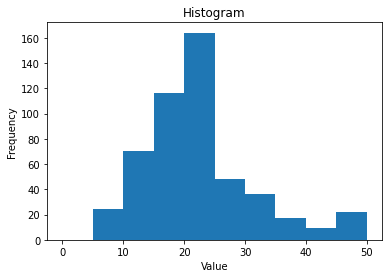

In [7]:
print(np.min(y))
print(np.max(y))
print(np.mean(y))
print(np.median(y))
print(np.std(y))

range = (0, 50)
# plot the histogram
plt.hist(y, bins=10, range=range)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()



In [11]:
from sklearn.model_selection import train_test_split


# poly = PolynomialFeatures(degree=8)
# xnew = poly.fit_transform(x) 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

len(x_train), len(x_test)

(354, 152)

In [14]:
linearModel_boston = lm.Ridge()
linearModel_boston.fit(x_train,y_train)
ytest_preds = linearModel_boston.predict(x_test)
MSE_test = mean_squared_error(y_test, ytest_preds)
print(MSE_test)

22.044053089861013
